---
title: Principes de base de données relationnelles
subtitle: Cours de Principes de BD relationnelles du Master 2 SDD  à l'IDMC
authors:
  - name: Malika SMAIL-TABBONE
    email: 
    affiliations:
      - name: Université de Lorraine, FRANCE
        ror: 04vfs2w97
date: 2025-11-21
---

MyST allows you to directly include Jupyter Notebooks in your books, documents and websites.
This Jupyter Notebook can be rendered directly using MyST.

For example, let us import `altair` and create a demo of an interactive plot!

Sites utiles :
- https://plantuml.com/en/ie-diagram
- https://plantuml.com/fr/class-diagram
- https://medium.com/@elvis.gosselin/plantuml-for-database-modeling-1b71e6d4622d



```plantuml
@startuml
  class Example {
    - String name
    - int number 
    
    +void getName()
    +void getNumber()
    +String toString()
  }
@enduml
```

```plantuml
A -> B: abc
```

In [3]:
import iplantuml

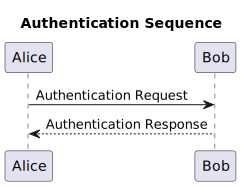

In [4]:
%%plantuml
@startuml
title Authentication Sequence
Alice -> Bob: Authentication Request
Bob --> Alice: Authentication Response
@enduml

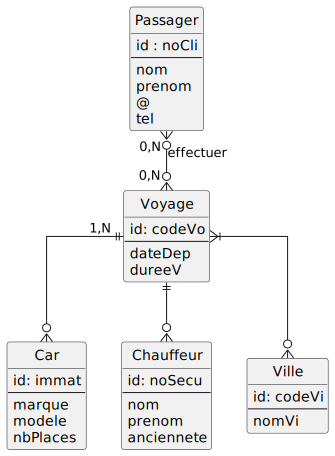

: 

In [ ]:
%%plantuml
@startuml

' configuration
hide circle
skinparam linetype ortho

' commentaire
entity "Passager" as passager {
 id : noCli
 --
 nom
 prenom
 @
 tel
}

' commentaire
entity "Car" as car {
 id: immat
 --
 marque
 modele
 nbPlaces
}

' commentaire
entity "Voyage" as voyage {
 id: codeVo
 --
 dateDep
 dureeV
}

' commentaire
entity "Chauffeur" as chauffeur {
 id: noSecu
 --
 nom
 prenom
 anciennete
}

' commentaire
entity "Ville" as ville {
 id: codeVi
 --
 nomVi
}

passager "0,N " }o--o{ "0,N " voyage : effectuer

voyage "1,N "||--o{ car
voyage }|--o{ ville
voyage ||--o{ chauffeur

@enduml

Contraintes d'intégrité (CI) :
- la durée d'un voyage est supérieure à la somme des durées de séjour aux différentes étapes
- le nombre de passager effectuant un voyage ne doit pas excéder la capacité du car prévu
- non ubiquité des chauffeurs, des cars et des passagers

Utilisation du programme looping pour modélisation les relations.

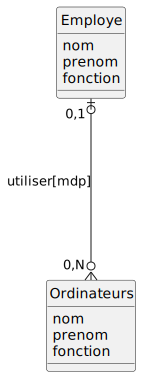

In [61]:
%%plantuml
@startuml

' configuration
hide circle
skinparam linetype ortho

' commentaire
entity "Employe" as employe {
 nom
 prenom
 fonction
}

' commentaire
entity "Ordinateurs" as ordinateurs {
 nom
 prenom
 fonction
}

employe "0,1 " |o----o{ "0,N " ordinateurs : utiliser[mdp]

@enduml

Nouvel exemple :

Commande (<u>noCde</u>, dateCde, *noCli*) -> 2 attributs calculés : montantHT, montantTTC<br>
Produit (<u>noP</u>, Prix, prixHTU)<br>
LigneCommande (<u>*noCde*, *noP*</u>, qté)

```sql
CREATE VIEW montantsCommandes (noCde, montHT, montTTC) AS
(SELECT  noCde, SUM(qté*prixHTU), SUM(qté*prixHTU) * 1.2
 FROM LigneCommande NATURAL JOIN Produit
 GROUP BY noCde
 )
```

**Entité faible** = entité qui dépend d'une autre entité<br>
Exemple : Ouvrage <-> Exemplaire (clé partielle)

**Spécialisation**

Pour le contrôle sur table du 28-NOV-2025, bien regarder les diapositives du cours sur la "Transformation des associations binaires" (~diapo n°100).

# **Cas Transport aérien**

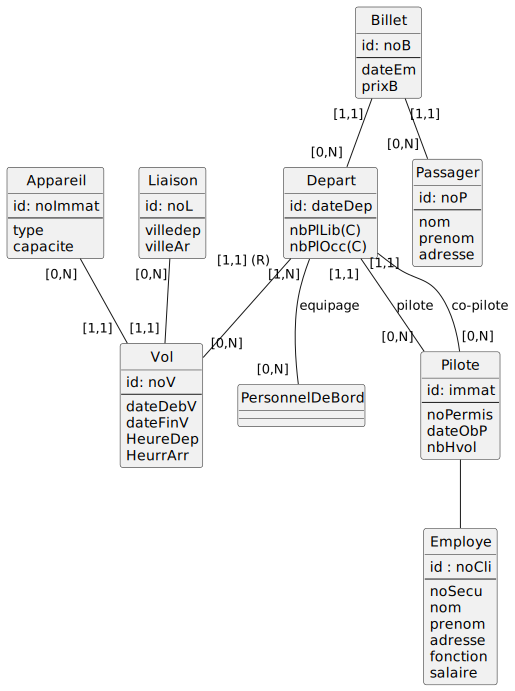

In [85]:
%%plantuml
@startuml

' configuration
hide spot
hide circle
'skinparam linetype ortho

' commentaire
entity "Employe" as employe {
 id : noCli
 --
 noSecu
 nom
 prenom
 adresse
 fonction
 salaire
}

' commentaire
entity "PersonnelDeBord" as personneldebord {
}

' commentaire
entity "Pilote" as pilote {
 id: immat
 --
 noPermis
 dateObP
 nbHvol
}

' commentaire
entity "Appareil" as appareil {
 id: noImmat
 --
 type
 capacite
}

' commentaire
entity "Vol" as vol {
 id: noV
 --
 dateDebV
 dateFinV
 HeureDep
 HeurrArr
}

' commentaire
entity "Liaison" as liaison {
 id: noL
 --
 villedep
 villeAr
}

' commentaire
entity "Depart" as depart {
 id: dateDep
 --
 nbPlLib(C)
 nbPlOcc(C)
}

' commentaire
entity "Passager" as passager {
 id: noP
 --
 nom
 prenom
 adresse
}

' commentaire
entity "Billet" as billet {
 id: noB
 --
 dateEm
 prixB
}

pilote -- employe
appareil "[0,N] " -- "[1,1]  " vol
liaison "[0,N]" -- "[1,1] " vol 
billet "[1,1] " -- "[0,N] " passager
billet "[1,1] " -- "[0,N] " depart
depart "[1,1] (R) " -- "[0,N] " vol
depart "[1,1] " -- "[0,N] " pilote : pilote
depart "[1,1] " -- "[0,N] " pilote : co-pilote
depart "[1,N] " -- "[0,N] " personneldebord : equipage


@enduml

Il y a une spécialisation entre les entités [Employé] et [Pilote].

Plateforme capsule pour faire des relations en réseau et bases de graphes, avec ensuite la méthode du plus court chemin.
Librairies python recommandée : plotly & networkx

Retrouver la video YTB sur la visualisation du plus court chemin dans une ville par rapport au trafic.